In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os

from pipeline import Pipeline, gather_results, print_results, plot_paths

# Calculate all simulation for all network

In [6]:
allRes = pd.DataFrame()
for network in ["italy_995", "germany", "usa_995", "cost266"]:
    for th_mod in np.arange(0, 1.1, 0.1):
        model = Pipeline(network, filter_th=True, th_mod=th_mod)
        resDf, resPathDict, resPathCfpDict, resDictPathAvbMeta = model.calculate_all_path()
        resOv = gather_results(network, resDf, resPathCfpDict)
        resOv.update({"th_mod":th_mod, "th":model.highest_bad})

        if th_mod == 0:
            resDf.to_excel(f"../results/{network}_simResults_without_th_cut.xlsx", index=False)
        elif th_mod == 1:
            resDf.to_excel(f"../results/{network}_simResults_with_th_cut.xlsx", index=False)
        else:
            pass

        allRes = pd.concat([allRes, pd.DataFrame(resOv, index = [0])])

allRes.reset_index(drop = True, inplace=True)

allRes[allRes["th_mod"] == 1].to_excel("../results/all_simResults_summary_with_th_cut.xlsx", index=False)
allRes[allRes["th_mod"] == 0].to_excel("../results/all_simResults_summary_without_th_cut.xlsx", index=False)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

In [5]:
allRes[allRes["th_mod"] == 1]

,network,fugg_jobb,eq,dual_jobb,fugg_meanLen,eq_f_meanLen,eq_d_meanLen,dual_meanLen,fuggBet_meanEdAvb,eq_meanEdAvb,dualBet_meanEdAvb,fugg_meanZpct,dual_meanZpct,fugg_meanEdAvb,dual_meanEdAvb,th_mod,th
10,italy_995,0,256,44,NaN,4.16,4.16,7.18,NaN,0.013078,0.025023,0.381794,0.241615,0.014963,0.014830,1.0,0.001707
21,germany,0,1225,0,NaN,5.23,5.23,NaN,NaN,0.000012,NaN,NaN,NaN,0.000012,0.000012,1.0,0.000006
32,usa_995,0,325,0,NaN,5.59,5.59,NaN,NaN,0.002575,NaN,NaN,NaN,0.002575,0.002575,1.0,0.000200
43,cost266,0,665,1,NaN,5.50,5.51,3.00,NaN,0.000546,0.003954,0.000000,0.000000,0.000551,0.000551,1.0,0.000007


In [6]:
pd.pivot_table(data=allRes, index=["network", "th_mod"], values=["fugg_jobb", "dual_jobb"])

dual_jobb  fugg_jobb
network   th_mod                      
cost266   0.0            33          0
          0.1             1          0
          0.2             1          0
          0.3             1          0
          0.4             1          0
          0.5             1          0
          0.6             1          0
          0.7             1          0
          0.8             1          0
          0.9             1          0
          1.0             1          0
germany   0.0             1          0
          0.1             4          0
          0.2             3          0
          0.3             3          0
          0.4             3          0
          0.5             0          0
          0.6             0          0
          0.7             0          0
          0.8             0          0
          0.9             0          0
          1.0             0          0
italy_995 0.0            21          0
          0.1            21          0
          0.2            15          0
          0.3            27          0
          0.4            15          0
          0.5             5          0
          0.6             6          0
          0.7             9          0
          0.8             7          0
          0.9            45          0
          1.0            44          0
usa_995   0.0            20          0
          0.1             0          0
          0.2             2          0
          0.3             0          0
          0.4             0          0
          0.5             0          0
          0.6             0          0
          0.7             0          0
          0.8             0          0
          0.9             0          0
          1.0             0          0

In [7]:
allRes[allRes["network"] == "italy_995"]

,network,fugg_jobb,eq,dual_jobb,fugg_meanLen,eq_f_meanLen,eq_d_meanLen,dual_meanLen,fuggBet_meanEdAvb,eq_meanEdAvb,dualBet_meanEdAvb,fugg_meanZpct,dual_meanZpct,fugg_meanEdAvb,dual_meanEdAvb,th_mod,th
0,italy_995,0,279,21,NaN,4.46,4.46,6.86,NaN,0.014321,0.023175,0.000000,0.000000,0.015064,0.014941,0.0,0.000000
1,italy_995,0,279,21,NaN,4.46,4.46,6.86,NaN,0.014397,0.023270,0.000000,0.000000,0.015147,0.015018,0.1,0.000171
2,italy_995,0,285,15,NaN,4.45,4.45,7.27,NaN,0.014725,0.022589,0.039339,0.039339,0.015234,0.015118,0.2,0.000341
3,italy_995,0,273,27,NaN,4.30,4.30,7.07,NaN,0.014829,0.021026,0.041374,0.043710,0.015522,0.015387,0.3,0.000512
4,italy_995,0,285,15,NaN,4.45,4.45,7.27,NaN,0.015088,0.022661,0.039339,0.039339,0.015618,0.015467,0.4,0.000683
5,italy_995,0,295,5,NaN,4.55,4.56,7.60,NaN,0.014909,0.029372,0.050000,0.025000,0.015194,0.015151,0.5,0.000854
6,italy_995,0,294,6,NaN,4.55,4.56,7.00,NaN,0.015400,0.030763,0.041667,0.020833,0.015733,0.015707,0.6,0.001024
7,italy_995,0,291,9,NaN,4.55,4.56,5.78,NaN,0.015285,0.025777,0.087037,0.041667,0.015619,0.015600,0.7,0.001195
8,italy_995,0,293,7,NaN,4.56,4.58,6.43,NaN,0.014690,0.029285,0.035714,0.017857,0.015043,0.015031,0.8,0.001366
9,italy_995,0,255,45,NaN,4.15,4.16,7.27,NaN,0.013289,0.023989,0.330406,0.207621,0.015234,0.014894,0.9,0.001537


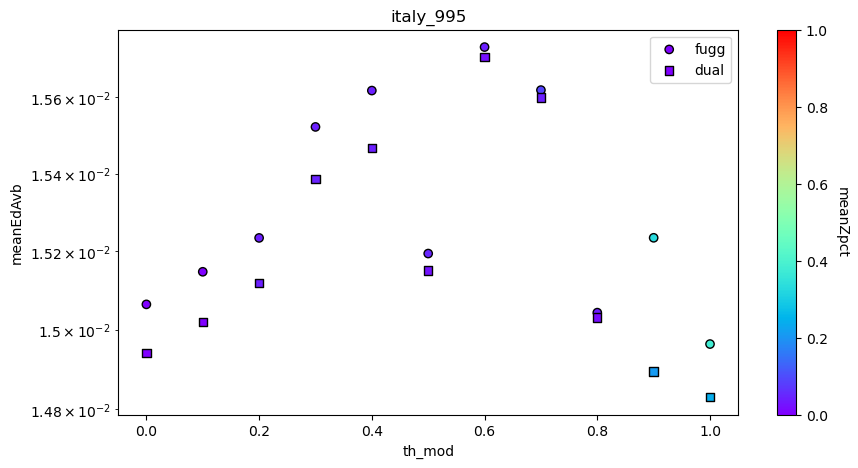

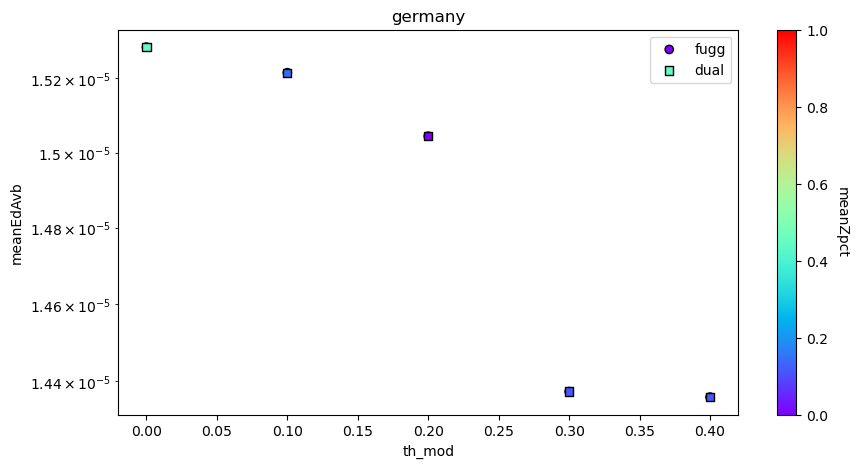

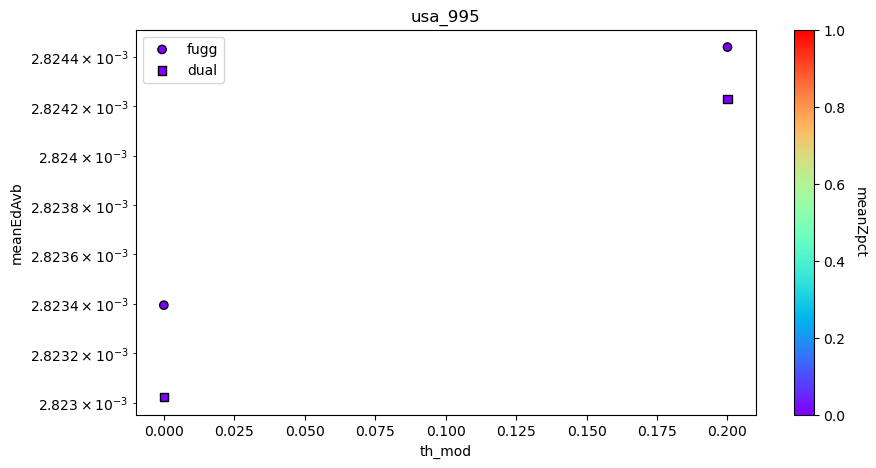

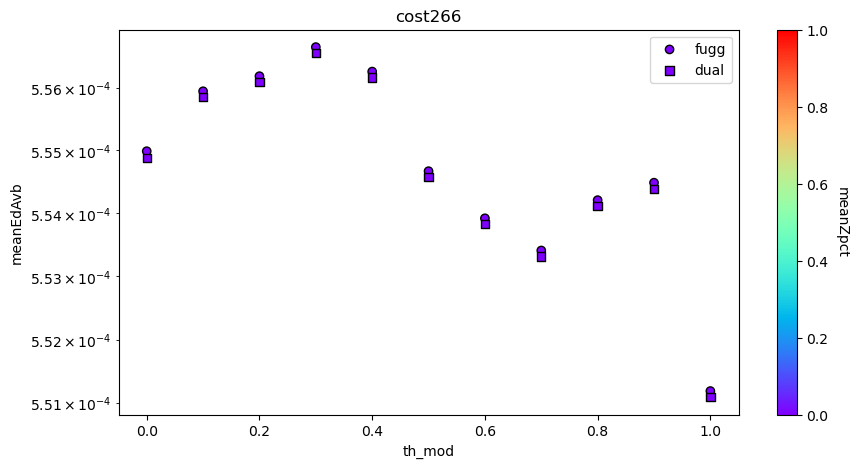

In [9]:
markers = ["o", "s", "H", "d"]
x = "th_mod"
y = "fugg_meanEdAvb"
y2 = "dual_meanEdAvb"
c = "fugg_meanZpct"
c2 = "dual_meanZpct"
sm = plt.cm.ScalarMappable(cmap="rainbow", norm=plt.Normalize(vmin=0, vmax=1))



for i,n in enumerate(allRes["network"].unique()):
    filter_n = allRes["network"] == n
    fig, ax = plt.subplots(figsize = (10,5))
    ax.scatter(data=allRes[filter_n], x = x, y = y, c= c , marker="o", cmap="rainbow", edgecolors="black", vmin=0, vmax=1, label = "fugg")
    ax.scatter(data=allRes[filter_n], x = x, y = y2, c= c2 , marker="s", cmap="rainbow", edgecolors="black", vmin=0, vmax=1, label = "dual")
    plt.xlabel(x)
    plt.ylabel("meanEdAvb")
    plt.yscale("log")
    cbar = plt.colorbar(sm, ax = ax)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel("meanZpct", rotation=270)
    plt.title(n)
    plt.legend()
    plt.show()

# Calculate all simulations for one network

In [2]:
NETWORK = "cost266"
TH_MOD= 0

model = Pipeline(NETWORK, filter_th=True, th_mod=TH_MOD)
resDf, resPathDict, resPathCfpDict, resDictPathAvbMeta = model.calculate_all_path()
print_results(resDf)

### Kiválaszott edgeknek átalgosan hány százaléka jutalmazott nulla
print(resDf[resDf["ed_avb_diff"] != 0][["pct_zero_fugg", "pct_zero_djk"]].mean() * 100)

display(resDf[["ed_avb_djk", "ed_avb_fugg", "ed_avb_sht"]].rank(axis = 1, ascending=True).value_counts(normalize=True).reset_index())

  0%|          | 0/666 [00:00<?, ?it/s]

Független féle availability alapján
Független a jobb 33
Egyelnő 633
Dualis a jobb 0


Duális féle cost függvény alapján
Független a jobb 0 esetben | Átlag cost: nan | Átlag hossz: nan
Egyelnő 633 esetben | Átlag cost: 0.0006 | Duális mean hossz: 5.3 | Független mean hossz: 5.3
Dualis a jobb 33 esetben | Átlag cost: 0.0005 | Átlag hossz: 7.85
pct_zero_fugg    0.0
pct_zero_djk     0.0
dtype: float64


,ed_avb_djk,ed_avb_fugg,ed_avb_sht,proportion
0,1.5,1.5,3.0,0.641141
1,2.0,2.0,2.0,0.309309
2,1.0,2.0,3.0,0.030030
3,1.0,2.5,2.5,0.019520


In [3]:
resDf[resDf["ed_avb_diff"] != 0]

,simID,start,target,len_sht,avb_sht,ed_avb_sht,len_djk,avb_djk,ed_avb_djk,len_fugg,...,avb_diff,ed_avb_diff,ed_avb_pct_diff,pct_zero_djk,pct_zero_fugg,pct_zero_sht,first_unmatch,len_diff,pct_zero_diff,ed_avb_class
23,23,0,24,4,0.999971,0.000028,6,0.999971,0.000028,4,...,-3.059979e-08,-1.533412e-07,-0.539084,0.0,0.0,0.0,3.0,2,0.0,dual
58,58,1,24,6,0.994976,0.004825,9,0.995986,0.003806,7,...,-3.047786e-08,-1.533412e-07,-0.004029,0.0,0.0,0.0,6.0,2,0.0,dual
69,69,1,35,1,0.995983,0.004017,3,0.995867,0.003954,1,...,-1.155976e-04,-6.360592e-05,-1.583267,0.0,0.0,0.0,0.0,2,0.0,dual
92,92,2,24,7,0.996487,0.003209,11,0.999803,0.000193,9,...,-3.059466e-08,-1.533412e-07,-0.079441,0.0,0.0,0.0,8.0,2,0.0,dual
125,125,3,24,5,0.999496,0.000476,7,0.999496,0.000476,5,...,-3.058525e-08,-1.533412e-07,-0.032201,0.0,0.0,0.0,4.0,2,0.0,dual
157,157,4,24,2,0.999981,0.000019,4,0.999981,0.000019,2,...,-3.060010e-08,-1.533412e-07,-0.818331,0.0,0.0,0.0,1.0,2,0.0,dual
188,188,5,24,6,0.999925,0.000074,8,0.999951,0.000047,6,...,-3.059919e-08,-1.533412e-07,-0.322477,0.0,0.0,0.0,5.0,2,0.0,dual
218,218,6,24,7,0.999663,0.000318,9,0.999888,0.000110,7,...,-3.059726e-08,-1.533412e-07,-0.139489,0.0,0.0,0.0,6.0,2,0.0,dual
247,247,7,24,5,0.999936,0.000063,7,0.999936,0.000063,5,...,-3.059873e-08,-1.533412e-07,-0.244559,0.0,0.0,0.0,4.0,2,0.0,dual
275,275,8,24,4,0.999645,0.000343,6,0.999700,0.000299,4,...,-3.059149e-08,-1.533412e-07,-0.051274,0.0,0.0,0.0,3.0,2,0.0,dual


## Plot all non-equal route 

In [20]:
folderName = f"{NETWORK}_nonEq_paths_thMod{TH_MOD}"
if folderName not in os.listdir("../results/"):
    os.mkdir(f"../results/{folderName}")

for s,t in resDf[resDf["ed_avb_diff"] != 0][["start", "target"]].values:
    model_oneP = Pipeline(NETWORK, filter_th=True, th_mod=TH_MOD)
    model_oneP.calculate_one_path(s,t)
    model_oneP.plot_base_with_path(s,t,fgSize=(17,6), export_to=f"../results/{folderName}/")

## Plot usage of edges

In [113]:
a = []
b = []
for i in resDf[resDf["ed_avb_diff"] != 0]["simID"]:
    a += [tuple(sorted(e, reverse=True)) for e in resPathDict[i]["djk_path"]]
    b += [tuple(sorted(e, reverse=True)) for e in resPathDict[i]["fuggetlen_path"]]

ad = pd.Series(a).value_counts().to_dict()
bd = pd.Series(b).value_counts().to_dict()

st_nodes = np.unique(resDf[resDf["ed_avb_diff"] != 0][["start", "target"]].to_numpy().flatten())
node_colors = ["lightblue" if i in st_nodes else "white" for i in model.g_base.nodes]
node_sizes = [450 if i in st_nodes else 300 for i in model.g_base.nodes]

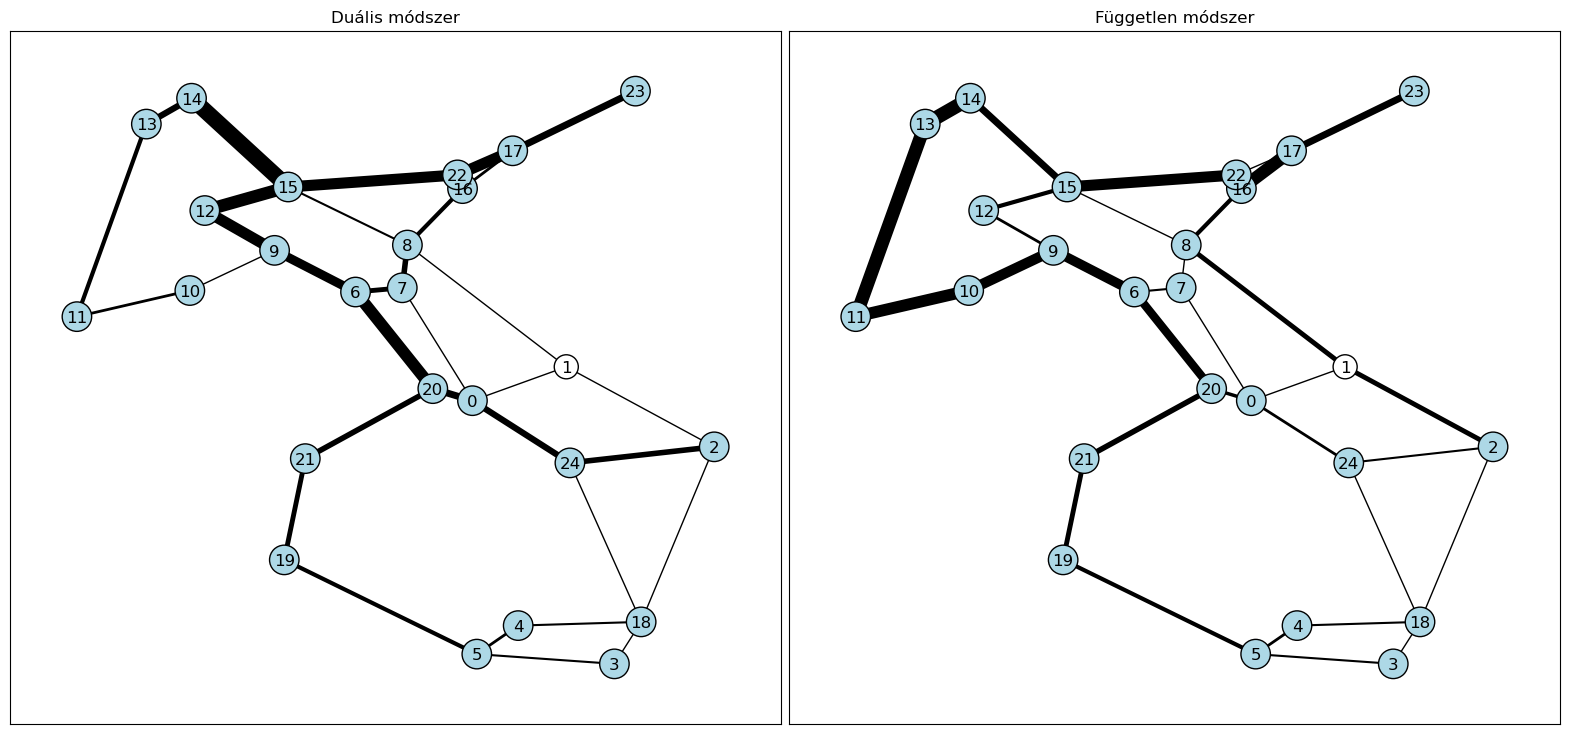

In [114]:
options = {
    'node_size': node_sizes,
    'node_color': node_colors,
    'edgecolors': 'black',
    'font_size': 12,
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

ad_width = [ad[tuple(sorted(edge, reverse=True))]*0.5+1 if tuple(sorted(edge, reverse=True)) in ad.keys() else 1 for edge in model.g_base.edges]
bd_width = [bd[tuple(sorted(edge, reverse=True))]*0.5+1 if tuple(sorted(edge, reverse=True)) in bd.keys() else 1 for edge in model.g_base.edges]

fig,ax = plt.subplots(ncols=2,figsize=(20,9))
plt.subplots_adjust(wspace=0.01)
nx.draw_networkx(model.g_base, model.g_base_pos, ax = ax[0], width = ad_width, **options)
ax[0].set_title("Duális módszer")
nx.draw_networkx(model.g_base, model.g_base_pos, ax = ax[1], width = bd_width, **options)
ax[1].set_title("Független módszer")

plt.show()

## Get plot and data for one simulation

In [4]:
simId = 302
s = resDf[resDf["simID"] == simId]["start"].iloc[0]
t = resDf[resDf["simID"] == simId]["target"].iloc[0]

In [5]:
resDictPathAvbMeta[simId]

{'djk_path': {'pos': [({(9, 31, 0)}, 4.830247321544556e-06),
   ({(15, 31, 0)}, 2.606800141785963e-06),
   ({(15, 24, 0)}, 7.4523815818115465e-06)],
  'neg': [({(9, 31, 0), (15, 31, 0)}, 4.600235544328155e-08),
   ({(15, 24, 0), (15, 31, 0)}, 1.380070663298447e-07)]},
 'sht_path': {'pos': [({(9, 24, 0)}, 1.485876080818003e-05)], 'neg': []},
 'fuggetlen_path': {'pos': [({(9, 24, 0)}, 1.485876080818003e-05)], 'neg': []}}

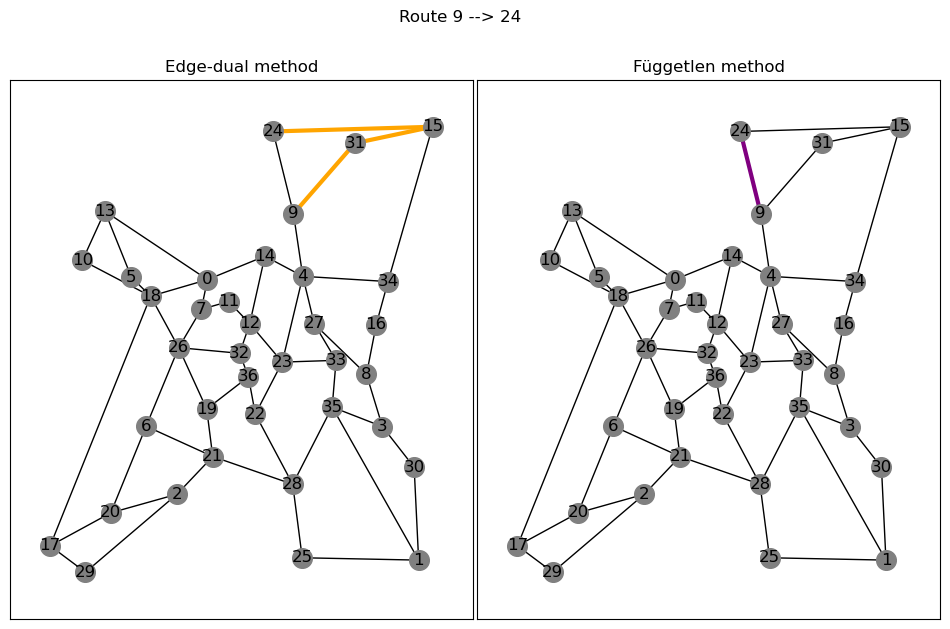

In [6]:
plot_paths(model.g_base, model.g_base_pos, resPathDict[simId]["djk_path"], resPathDict[simId]["fuggetlen_path"], s,t, fgSize=(12,7))

In [7]:
miniNetwork = set()
for path in ["djk_path", "fuggetlen_path"]:
    for sign in ["pos", "neg"]:
        for res in resDictPathAvbMeta[simId][path][sign]:
            miniNetwork.update(res[0])

miniNetwork = list(miniNetwork)
print(miniNetwork)

[(15, 24, 0), (9, 31, 0), (9, 24, 0), (15, 31, 0)]


In [8]:
model.get_srlg_info_table(miniNetwork)

,idx,edgeNum,prob,connected,diameter,usable,above_th
0,183,2,2.606800e-07,True,2,True,True
1,184,1,7.452382e-06,True,1,True,True
2,185,1,1.485876e-05,True,1,True,True
3,210,2,9.200471e-08,True,2,True,True
4,212,1,4.830247e-06,True,1,True,True
5,264,2,4.600236e-08,True,2,True,True
6,265,1,2.606800e-06,True,1,True,True
7,285,2,1.380071e-07,True,2,True,True
